# Domain: Social Network
Project 05: Facebook data
Dataset contains pseudo Facebook data.

Attribute Information:
Userid : ID of user
Age : User’s age(years)
dob_day : Day of date of birth(1-31)
dob_year : Year of date of birth 
dob_month : Month of date of birth 
gender : M/F
tenure : How long have facebook users been on site
friend_count : Total number of friends 
friendships_initiated : Friend requests sent
likes : Total number of likes by user
likes_received : Total number of likes received by user 
mobile_likes : Number of likes by user(through mobile)
mobile_likes_received : Number of likes recieved by user(through mobile) 
www_likes : Number of likes by user(through desktop website) 
www_likes_received : Number of likes received by user(through desktop)
    
Exploration ideas:
Date of birth analysis Friend count analysis
Tenure analysis
Data transformations
Frequency polygons, Boxplots.

In [69]:
#Import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

In [70]:
#Read the input file in variable facebook

path = 'C:/Users/Vasu/Desktop/Vasu/LEARNING/data Analytics/UPX/Projects/Project5_Facebook/pseudo_facebook.tsv'
fb = pd.read_csv(path,sep='\t',parse_dates=[[3,4,2]])
fb.tail()

,dob_year_dob_month_dob_day,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,1945-04-04,1268299,68,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1995-03-12,1256153,18,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1998-05-10,1195943,15,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1990-04-11,1468023,23,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1974-05-15,1397896,39,female,397.0,2049,768,9410,12443,9410,9530,0,2913


In [71]:
#facebook variable no of rows and columns
fb.shape

(99003, 13)

In [72]:
#facebook variable column variables and data types
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 13 columns):
dob_year_dob_month_dob_day    99003 non-null datetime64[ns]
userid                        99003 non-null int64
age                           99003 non-null int64
gender                        98828 non-null object
tenure                        99001 non-null float64
friend_count                  99003 non-null int64
friendships_initiated         99003 non-null int64
likes                         99003 non-null int64
likes_received                99003 non-null int64
mobile_likes                  99003 non-null int64
mobile_likes_received         99003 non-null int64
www_likes                     99003 non-null int64
www_likes_received            99003 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(10), object(1)
memory usage: 9.8+ MB


In [73]:
#Renaming the date of birth coumn to shorter name as DOB and further setting index of te dataframe as userid

fb.rename(columns = {'dob_year_dob_month_dob_day':'DOB'},inplace=True)
fb = fb.set_index('userid')
fb.head()

,DOB,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,,,,,,,,,,,,
2094382,1999-11-19,14,male,266.0,0,0,0,0,0,0,0,0
1192601,1999-11-02,14,female,6.0,0,0,0,0,0,0,0,0
2083884,1999-11-16,14,male,13.0,0,0,0,0,0,0,0,0
1203168,1999-12-25,14,female,93.0,0,0,0,0,0,0,0,0
1733186,1999-12-04,14,male,82.0,0,0,0,0,0,0,0,0


In [74]:
#Use describe function to see the various aspects of facebbok data

fb.describe()

,age,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,37.280224,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,22.589748,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,50.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,113.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [75]:
#Lets try for Q01

fb_males = fb[fb['gender']=='male']
fb_females = fb[fb['gender']=='female']
fb_males = fb_males[['age','mobile_likes','mobile_likes_received','www_likes','www_likes_received']]
fb_females = fb_females[['age','mobile_likes','mobile_likes_received','www_likes','www_likes_received']]


In [76]:
fb_females.head()

,age,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,,,,,
1192601,14,0,0,0,0
1203168,14,0,0,0,0
1680361,13,0,0,0,0
1932519,13,0,0,0,0
1751722,13,0,0,0,0


In [77]:
def age_compute(row):
    if row['age'] < 20:
        return '13-19'
    elif row['age'] >= 20 and row['age'] < 40:
        return '20-39'
    elif row['age'] >= 40 and row['age'] < 60:
        return '40-60'
    elif row['age'] >= 60:
        return '60 Plus'

fb_males['age_group'] = fb_males.apply(age_compute,axis=1)
fb_females['age_group'] = fb_females.apply(age_compute,axis=1)

In [78]:
fb_males=fb_males.groupby('age_group').sum()
fb_males

,age,mobile_likes,mobile_likes_received,www_likes,www_likes_received
age_group,,,,,
13-19,215136,891893,680625,402613,448876
20-39,766100,1597066,1027395,447050,636151
40-60,469741,536046,295073,218170,210702
60 Plus,638372,504742,388660,362342,290369


In [79]:
fb_females=fb_females.groupby('age_group').sum()
fb_females

,age,mobile_likes,mobile_likes_received,www_likes,www_likes_received
age_group,,,,,
13-19,139452,2096448,2227044,1085177,1593739
20-39,421827,2704537,2446119,935987,1502694
40-60,440778,1365507,750150,795068,665749
60 Plus,586362,793945,498086,691433,437697


In [80]:
fb_males = fb_males.reset_index()
fb_males

,age_group,age,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,13-19,215136,891893,680625,402613,448876
1,20-39,766100,1597066,1027395,447050,636151
2,40-60,469741,536046,295073,218170,210702
3,60 Plus,638372,504742,388660,362342,290369


In [81]:
fb_females = fb_females.reset_index()
fb_females

,age_group,age,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,13-19,139452,2096448,2227044,1085177,1593739
1,20-39,421827,2704537,2446119,935987,1502694
2,40-60,440778,1365507,750150,795068,665749
3,60 Plus,586362,793945,498086,691433,437697


In [82]:
fb_males = fb_males[['age_group','mobile_likes','mobile_likes_received','www_likes','www_likes_received']]
fb_males

,age_group,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,13-19,891893,680625,402613,448876
1,20-39,1597066,1027395,447050,636151
2,40-60,536046,295073,218170,210702
3,60 Plus,504742,388660,362342,290369


In [83]:
fb_females = fb_females[['age_group','mobile_likes','mobile_likes_received','www_likes','www_likes_received']]
fb_females

,age_group,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,13-19,2096448,2227044,1085177,1593739
1,20-39,2704537,2446119,935987,1502694
2,40-60,1365507,750150,795068,665749
3,60 Plus,793945,498086,691433,437697


In [84]:
fb_males.columns = ['age_group','male_mobile_likes','male_moblikes_received','male_www_likes','male_wwwlks_received']
fb_males

,age_group,male_mobile_likes,male_moblikes_received,male_www_likes,male_wwwlks_received
0,13-19,891893,680625,402613,448876
1,20-39,1597066,1027395,447050,636151
2,40-60,536046,295073,218170,210702
3,60 Plus,504742,388660,362342,290369


In [85]:
fb_females.columns = ['age_group','female_mobile_likes','female_moblikes_received','female_www_likes','female_wwwlks_received']
fb_females

,age_group,female_mobile_likes,female_moblikes_received,female_www_likes,female_wwwlks_received
0,13-19,2096448,2227044,1085177,1593739
1,20-39,2704537,2446119,935987,1502694
2,40-60,1365507,750150,795068,665749
3,60 Plus,793945,498086,691433,437697


In [86]:
fb_age_grp = [fb_males,fb_females]
result = pd.concat(fb_age_grp,axis=1)
result



,age_group,male_mobile_likes,male_moblikes_received,male_www_likes,male_wwwlks_received,age_group,female_mobile_likes,female_moblikes_received,female_www_likes,female_wwwlks_received
0,13-19,891893,680625,402613,448876,13-19,2096448,2227044,1085177,1593739
1,20-39,1597066,1027395,447050,636151,20-39,2704537,2446119,935987,1502694
2,40-60,536046,295073,218170,210702,40-60,1365507,750150,795068,665749
3,60 Plus,504742,388660,362342,290369,60 Plus,793945,498086,691433,437697


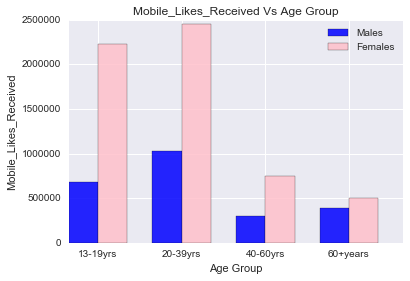

In [87]:
#Lets plot bar graph for 'Age Group' Vs Mobile_Likes_Received

n_groups = 4
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = .85
 
rects1 = plt.bar(index, result['male_moblikes_received'], bar_width,
                 alpha=opacity,
                 color='blue',
                 label='Males')
 
rects2 = plt.bar(index + bar_width, result['female_moblikes_received'], bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Females')
 
plt.xlabel('Age Group')
plt.ylabel('Mobile_Likes_Received')
plt.title('Mobile_Likes_Received Vs Age Group')
plt.xticks(index + bar_width, ('13-19yrs', '20-39yrs', '40-60yrs', '60+years'))
plt.legend()

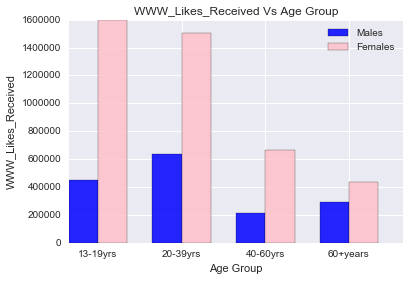

In [88]:
#Lets plot bar graph for 'Age Group' Vs WWW_Likes_Received

n_groups = 4
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = .85
 
rects1 = plt.bar(index, result['male_wwwlks_received'], bar_width,
                 alpha=opacity,
                 color='blue',
                 label='Males')
 
rects2 = plt.bar(index + bar_width, result['female_wwwlks_received'], bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Females')
 
plt.xlabel('Age Group')
plt.ylabel('WWW_Likes_Received')
plt.title('WWW_Likes_Received Vs Age Group')
plt.xticks(index + bar_width, ('13-19yrs', '20-39yrs', '40-60yrs', '60+years'))
plt.legend()

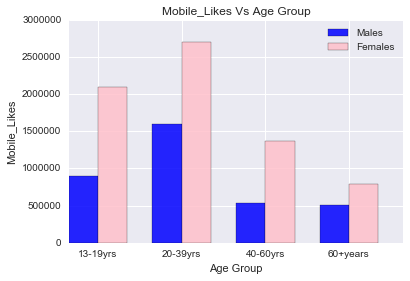

In [89]:
#Lets plot bar graph for 'Age Group' Vs Mobile_Likes

n_groups = 4
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = .85
 
rects1 = plt.bar(index, result['male_mobile_likes'], bar_width,
                 alpha=opacity,
                 color='blue',
                 label='Males')
 
rects2 = plt.bar(index + bar_width, result['female_mobile_likes'], bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Females')
 
plt.xlabel('Age Group')
plt.ylabel('Mobile_Likes')
plt.title('Mobile_Likes Vs Age Group')
plt.xticks(index + bar_width, ('13-19yrs', '20-39yrs', '40-60yrs', '60+years'))
plt.legend()

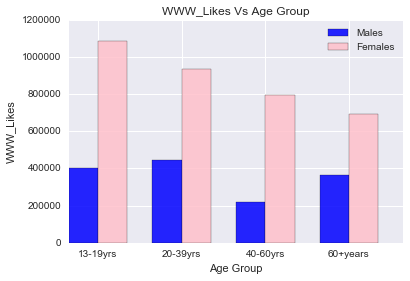

In [90]:
#Lets plot bar graph for 'Age Group' Vs WWW_Likes

n_groups = 4
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = .85
 
rects1 = plt.bar(index, result['male_www_likes'], bar_width,
                 alpha=opacity,
                 color='blue',
                 label='Males')
 
rects2 = plt.bar(index + bar_width, result['female_www_likes'], bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Females')
 
plt.xlabel('Age Group')
plt.ylabel('WWW_Likes')
plt.title('WWW_Likes Vs Age Group')
plt.xticks(index + bar_width, ('13-19yrs', '20-39yrs', '40-60yrs', '60+years'))
plt.legend()

Conclusion:- Irrespective of one falls in which Age Group, Females are leading. Whether it is mobile_likes_received OR www_likes received, Females likes received count outnumbers the Males.
Well Females are not only leading in the Likes_received rather they are ahead in giving likes also, so whether the likes are provided in Mobile or in WWW, Females are winning this race as well.. :).